In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [3]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- LabelEncoder()
- train_test_split()
- DecisionTreeClassifier(criterion="entropy",)
- plot_tree()

In [4]:
my_data.shape

(200, 6)

In [5]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Exercise
Build multi-class model for decision tree and visualize trained dataset

In [7]:
# Label encoder to convert categorical variable to numerical

my_data = my_data.apply(LabelEncoder().fit_transform)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,4
1,30,1,1,0,89,2
2,30,1,1,0,43,2
3,12,0,2,0,10,3
4,44,0,1,0,133,4


In [8]:
X = my_data.drop(['Drug'], axis=1)
y = my_data["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                    random_state=42)

In [9]:
# Decision Tree Classifier
cart = DecisionTreeClassifier(criterion="entropy")
cart_model = cart.fit(X_train, y_train)
cart_model.get_params()

# Evaluation
accuracy = cart_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [10]:
# Prediction
predTree = cart_model.predict(X_test)
print(predTree)

[3 4 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 3 4 2 2 4 0 4 3
 0 4 0 3 3 3 4 4 2 4 4 4 3 3 4 3 4 3 4 0 4 4 4]


In [11]:
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, predTree)))

 Accuracy of Decision Tree Classifier on test set: 100.00%


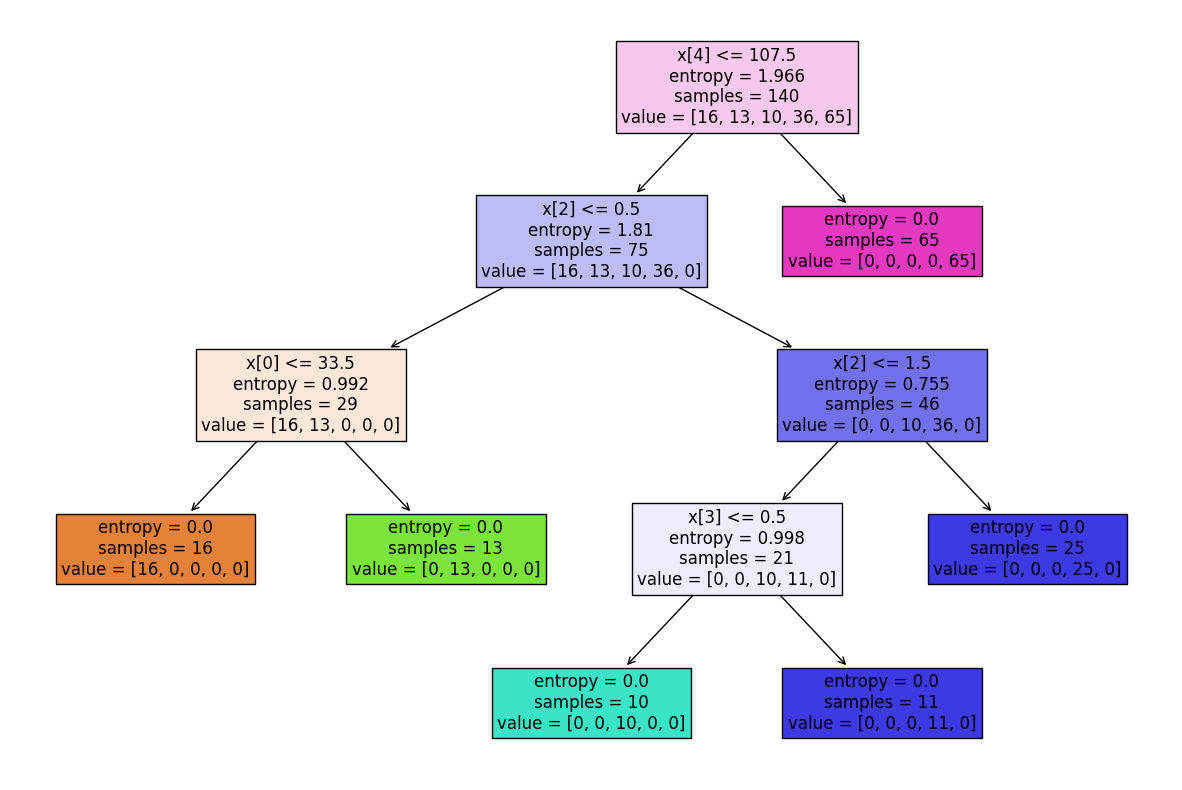

In [12]:
# plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(cart_model, filled=True, fontsize=12)
plt.show()